# Exploratory data analysis

## Imports y data laod

In [147]:
#imports
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score, ConfusionMatrixDisplay

In [148]:
#read data
df = pd.read_csv('../data/datos_TP1_2025.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57510 entries, 0 to 57509
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Estudios_máximos_antes_de_la_inscripción_label  57510 non-null  object
 1   estado_civil_label                              57510 non-null  object
 2   modo_aplicacion_label                           57510 non-null  object
 3   sexo_label                                      57510 non-null  object
 4   desplazado_label                                57510 non-null  object
 5   target_label                                    57510 non-null  object
 6   Carrera                                         57510 non-null  object
 7   Asistencia_diurna/nocturna                      57510 non-null  object
 8   Cualificación_promedio_de_estudios_previos      57510 non-null  int64 
 9   Puntaje_en_examen_de_ingreso                    57

In [149]:
# Remover "_label" de todas las columnas que lo tengan
df.columns = [col.replace('_label', '') if col.endswith('_label') else col for col in df.columns]

# Análisis

In [150]:
cols_object = df.select_dtypes(include='object').columns
print(cols_object)

Index(['Estudios_máximos_antes_de_la_inscripción', 'estado_civil',
       'modo_aplicacion', 'sexo', 'desplazado', 'target', 'Carrera',
       'Asistencia_diurna/nocturna', 'Necesidades_educativas_especiales',
       'Tiene_deuda', 'Pago_de_matrícula_al_día', 'Poseedor_de_Beca',
       'Estudiante_Internacional', 'Demanda_Cog_Padre', 'Demanda_Cog_Madre',
       'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')


In [151]:
# df es tu DataFrame
cols_interger = df.select_dtypes(include='int64').columns
print(cols_interger)

Index(['Cualificación_promedio_de_estudios_previos',
       'Puntaje_en_examen_de_ingreso', 'Edad_al_momento_de_la_inscripción',
       'Unidades_curriculares_1er_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_1er_semestre',
       'Unidades_curriculares_1er_semestre_(aprobadas)',
       'Nota_promedio_en_el_1er_semestre',
       'Unidades_curriculares_2do_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_2do_semestre_',
       'Unidades_curriculares_2do_semestre_(aprobadas)',
       'Nota_promedio_en_el_2do_semestre'],
      dtype='object')


In [152]:
import plotly.express as px

def plot_distribution(df, column_name, title=None, sort_by='count'):
    """
    Crea un gráfico de barras de la distribución de una variable con porcentajes
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos
    column_name : str
        Nombre de la columna a graficar
    title : str, optional
        Título del gráfico
    sort_by : str
        'count' para ordenar por frecuencia, 'value' por valor
    """
    # Contar valores únicos y calcular porcentajes
    counts = df[column_name].value_counts().reset_index()
    counts.columns = [column_name, 'count']
    counts['percentage'] = (counts['count'] / counts['count'].sum() * 100).round(1)
    
    # Ordenar
    if sort_by == 'value':
        counts = counts.sort_values(column_name)
    
    # Crear gráfico
    fig = px.bar(
        counts, 
        x=column_name, 
        y='count',
        color=column_name,
        title=title or f'Distribución de {column_name}',
        labels={'count': 'Frecuencia'},
        text='percentage'  # Mostrar porcentajes como texto
    )
    
    # Personalizar texto
    fig.update_traces(
        texttemplate='%{text}%',  
        textposition='outside'    
    )
    
    # Personalizar layout
    fig.update_layout(
        showlegend=False,
        xaxis_title=column_name,
        yaxis_title='Frecuencia'
    )
    
    fig.show()

In [153]:
plot_distribution(df, 'Estudios_máximos_antes_de_la_inscripción', 'Distribución de la variable estudios máximos antes de la inscripción')

In [154]:
plot_distribution(df, 'estado_civil', 'Distribución de la variable estado civil')

In [155]:
plot_distribution(df, 'modo_aplicacion', 'Distribución de la variable modo de aplicación')

In [156]:
def plot_pie_distribution(df, column_name, title=None, hole_size=0.3):
    """
    Versión con más opciones de personalización
    """
    counts = df[column_name].value_counts().reset_index()
    counts.columns = [column_name, 'count']
    
    # Calcular porcentajes
    counts['percentage'] = (counts['count'] / counts['count'].sum() * 100).round(1)
    
    fig = px.pie(
        counts,
        values='count',
        names=column_name,
        title=title or f'Distribución de {column_name}',
        color=column_name,
        hole=hole_size
    )
    
    # Configurar texto
    text_info = 'percent+label'
    
    fig.update_traces(
        textposition='inside',
        textinfo=text_info,
        textfont_size=12,
        hovertemplate='<b>%{label}</b><br>Cantidad: %{value}<br>Porcentaje: %{percent}<extra></extra>'
    )
    
    fig.show()

In [157]:
plot_pie_distribution(df, 'sexo')

In [158]:
plot_distribution(df, 'Carrera', 'Distribución de la variable carrera')

In [159]:
plot_distribution(df, 'target', 'Distribución de la variable target')

In [160]:
def plot_boxplot(df, column_name, title=None, group_by=None, color_by=None):
    """
    Boxplot con opciones avanzadas de agrupación
    
    Parameters:
    -----------
    group_by : str, optional
        Variable categórica para el eje X
    color_by : str, optional
        Variable categórica para colorear (puede ser diferente a group_by)
    """
    # Si no se especifica color_by, usar group_by
    color_var = color_by if color_by else group_by
    
    fig = px.box(
        df,
        x=group_by,
        y=column_name,
        color=color_var,
        title=title or f'Distribución de {column_name}' + (f' por {group_by}' if group_by else ''),
        points="outliers"
    )
    
    fig.update_layout(
        width=700,
        height=500,
        yaxis_title=column_name,
        xaxis_title=group_by if group_by else '',
        showlegend=True if color_by and color_by != group_by else False,
        margin=dict(l=50, r=50, t=50, b=50)
    )
    
    if group_by:
        fig.update_xaxes(tickangle=45)
    
    fig.show()



In [161]:
plot_boxplot(df, 'Cualificación_promedio_de_estudios_previos', 'Distrubución de la variable cualificación promedio de estudios previos')

In [162]:
plot_boxplot(df, 'Cualificación_promedio_de_estudios_previos', 'Distrubución de cualificación promedio de estudios previos x variable target', group_by='target', color_by='target')

In [163]:
plot_boxplot(df, 'Puntaje_en_examen_de_ingreso', 'Distrubución del puntaje examen de ingreso')

In [164]:
plot_boxplot(df, 'Puntaje_en_examen_de_ingreso', 'Distrubución del puntaje examen de ingreso x variable target', group_by='target', color_by='target')

In [165]:
import pandas as pd
import plotly.express as px

def plot_categorical_relation(df, col1, col2, title=None, kind='grouped'):
    """
    Crea un gráfico de barras mostrando la relación entre dos variables categóricas
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos
    col1 : str
        Variable en el eje x
    col2 : str
        Variable para separar por color
    title : str, optional
        Título del gráfico
    kind : str
        'grouped' para barras lado a lado, 'stacked' para barras apiladas
    """
    # Crear tabla de contingencia
    counts = pd.crosstab(df[col1], df[col2]).reset_index()
    counts_melt = counts.melt(id_vars=col1, var_name=col2, value_name='count')
    
    # Calcular porcentaje relativo al total de cada col1
    counts_melt['percentage'] = counts_melt.groupby(col1)['count'].transform(lambda x: x / x.sum() * 100)
    
    # Determinar modo de barras
    barmode = 'group' if kind=='grouped' else 'stack'
    
    # Crear gráfico
    fig = px.bar(
        counts_melt,
        x=col1,
        y='count',
        color=col2,
        text='percentage',
        title=title or f'Relación entre {col1} y {col2}',
    )
    
    # Personalizar texto y layout
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.update_layout(
        barmode=barmode,
        xaxis_title=col1,
        yaxis_title='Frecuencia'
    )
    
    fig.show()


In [166]:
int_cols = df.select_dtypes(include='int').columns
df_int = df[int_cols]

# Calcular matriz de correlación
corr_matrix = df_int.corr()

# Mostrarla
print(corr_matrix)

                                                Cualificación_promedio_de_estudios_previos  \
Cualificación_promedio_de_estudios_previos                                        1.000000   
Puntaje_en_examen_de_ingreso                                                      0.620736   
Edad_al_momento_de_la_inscripción                                                -0.106343   
Unidades_curriculares_1er_semestre_(inscrito)                                     0.085755   
Cantidad_de_evaluaciones_en_el_1er_semestre                                      -0.090747   
Unidades_curriculares_1er_semestre_(aprobadas)                                    0.153077   
Nota_promedio_en_el_1er_semestre                                                  0.298233   
Unidades_curriculares_2do_semestre_(inscrito)                                     0.108963   
Cantidad_de_evaluaciones_en_el_2do_semestre_                                     -0.083380   
Unidades_curriculares_2do_semestre_(aprobadas)              

In [167]:
# df es tu DataFrame
cols_object = df.select_dtypes(include='object').columns
print(cols_object)

Index(['Estudios_máximos_antes_de_la_inscripción', 'estado_civil',
       'modo_aplicacion', 'sexo', 'desplazado', 'target', 'Carrera',
       'Asistencia_diurna/nocturna', 'Necesidades_educativas_especiales',
       'Tiene_deuda', 'Pago_de_matrícula_al_día', 'Poseedor_de_Beca',
       'Estudiante_Internacional', 'Demanda_Cog_Padre', 'Demanda_Cog_Madre',
       'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')


In [168]:
plot_categorical_relation(df, 'Asistencia_diurna/nocturna','target')

In [169]:
plot_categorical_relation(df, 'Tiene_deuda','target')

In [170]:
plot_categorical_relation(df, 'Demanda_Cog_Padre','target')

In [171]:
plot_categorical_relation(df, 'Demanda_Cog_Madre','target')

In [172]:
plot_categorical_relation(df, 'Ingresos_Madre','target')

In [173]:
plot_categorical_relation(df, 'Ingresos_Padre','target')

In [174]:
plot_categorical_relation(df, 'Poseedor_de_Beca','target')

In [175]:
plot_categorical_relation(df, 'Carrera','target')

In [176]:
plot_categorical_relation(df, 'Estudios_máximos_antes_de_la_inscripción','target')

## Transformación de variables

In [177]:
cols_object

Index(['Estudios_máximos_antes_de_la_inscripción', 'estado_civil',
       'modo_aplicacion', 'sexo', 'desplazado', 'target', 'Carrera',
       'Asistencia_diurna/nocturna', 'Necesidades_educativas_especiales',
       'Tiene_deuda', 'Pago_de_matrícula_al_día', 'Poseedor_de_Beca',
       'Estudiante_Internacional', 'Demanda_Cog_Padre', 'Demanda_Cog_Madre',
       'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')

In [178]:
#Transoformo la variable en numérica

df['Estudios_máximos_antes_de_la_inscripción'] = df['Estudios_máximos_antes_de_la_inscripción'].map({
    'Otros / No completado': 1,
    'Educación Básica': 2,
    'Educación Secundaria': 3,
    'Superior - Pregrado': 4,
    'Superior - Posgrado': 5 
})

# O convertir a int si no hay NaN
df['Estudios_máximos_antes_de_la_inscripción'] = df['Estudios_máximos_antes_de_la_inscripción'].astype(int)



In [179]:
#Transoformo la variable en numérica
df['Demanda_Cog_Padre'] = df['Demanda_Cog_Padre'].map({
    'Muy baja demanda cognitiva': 1,
    'Demanda cognitiva baja': 2,
    'Demanda cognitiva media': 3,
    'Alta demanda cognitiva': 4,
    'Muy alta demanda cognitiva': 5 
})

# O convertir a int si no hay NaN
df['Demanda_Cog_Padre'] = df['Demanda_Cog_Padre'].astype(int)

In [180]:
#Transoformo la variable en numérica
df['Demanda_Cog_Madre'] = df['Demanda_Cog_Madre'].map({
    'Muy baja demanda cognitiva': 1,
    'Demanda cognitiva baja': 2,
    'Demanda cognitiva media': 3,
    'Alta demanda cognitiva': 4,
    'Muy alta demanda cognitiva': 5 
})

# O convertir a int si no hay NaN
df['Demanda_Cog_Madre'] = df['Demanda_Cog_Madre'].astype(int)

In [181]:
#Transoformo la variable en numérica
df['Ingresos_Padre'] = df['Ingresos_Padre'].map({
    'Bajos ingresos': 1,
    'Ingresos medios-bajos': 2,
    'Ingresos medios': 3,
    'Ingresos medios-altos': 4,
    'Altos ingresos': 5 
})

# O convertir a int si no hay NaN
df['Ingresos_Padre'] = df['Ingresos_Padre'].astype(int)

In [182]:
#Transoformo la variable en numérica
df['Ingresos_Madre'] = df['Ingresos_Madre'].map({
    'Bajos ingresos': 1,
    'Ingresos medios-bajos': 2,
    'Ingresos medios': 3,
    'Ingresos medios-altos': 4,
    'Altos ingresos': 5 
})

# O convertir a int si no hay NaN
df['Ingresos_Madre'] = df['Ingresos_Madre'].astype(int)

In [183]:
df.Ingresos_Padre.value_counts()

Ingresos_Padre
2    22165
1    20386
4     7470
3     5162
5     2327
Name: count, dtype: int64

In [184]:
import re

def number_find_col(df, cols):
    """
    Recorre las columnas especificadas y, si un valor empieza con un número seguido de un espacio,
    reemplaza ese valor por el número encontrado.
    """
    for col in cols:
        if col in df.columns:
            # Aplicar a cada valor de la columna
            df[col] = df[col].apply(
                lambda x: int(re.match(r'^(\d+)\s', str(x)).group(1)) if re.match(r'^(\d+)\s', str(x)) else x
                )
    return df  # Devuelve el DataFrame modificado

In [185]:
# df es tu DataFrame
cols_interger = df.select_dtypes(include='int64').columns
print(cols_interger)

Index(['Estudios_máximos_antes_de_la_inscripción',
       'Cualificación_promedio_de_estudios_previos',
       'Puntaje_en_examen_de_ingreso', 'Edad_al_momento_de_la_inscripción',
       'Unidades_curriculares_1er_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_1er_semestre',
       'Unidades_curriculares_1er_semestre_(aprobadas)',
       'Nota_promedio_en_el_1er_semestre',
       'Unidades_curriculares_2do_semestre_(inscrito)',
       'Cantidad_de_evaluaciones_en_el_2do_semestre_',
       'Unidades_curriculares_2do_semestre_(aprobadas)',
       'Nota_promedio_en_el_2do_semestre', 'Demanda_Cog_Padre',
       'Demanda_Cog_Madre', 'Ingresos_Padre', 'Ingresos_Madre'],
      dtype='object')


In [186]:
number_find_col(df, cols_object)

Estudios_máximos_antes_de_la_inscripción  estado_civil  \
0                                             3             1   
1                                             3             1   
2                                             3             1   
3                                             4             1   
4                                             3             1   
...                                         ...           ...   
57505                                         3             1   
57506                                         3             1   
57507                                         3             1   
57508                                         3             5   
57509                                         3             1   

                       modo_aplicacion  sexo  desplazado    target  \
0                       Acceso General     0           0  Desertor   
1      Acceso por Normativa Específica     0           1  En Curso   
2      Acceso por Normativa Específica     0           1  Desertor   
3                       Acceso General     0           1  Desertor   
4                       Acceso General     1           1  Desertor   
...                                ...   ...         ...       ...   
57505                   Acceso General     0           1  Desertor   
57506                   Acceso General     0           1  Desertor   
57507  Contingente Especial (Regional)     0           1  Desertor   
57508                   Acceso General     0           1  En Curso   
57509                   Acceso General     0           1  Desertor   

                         Carrera  Asistencia_diurna/nocturna  \
0                        Derecho                           1   
1                     Enfermería                           1   
2                     Enfermería                           1   
3                       Economía                           1   
4      Periodismo y Comunicación                           1   
...                          ...                         ...   
57505                    Derecho                           1   
57506                    Turismo                           1   
57507                    Turismo                           1   
57508                   Economía                           1   
57509  Periodismo y Comunicación                           1   

       Cualificación_promedio_de_estudios_previos  \
0                                              66   
1                                              69   
2                                              69   
3                                              68   
4                                              68   
...                                           ...   
57505                                          71   
57506                                          64   
57507                                          66   
57508                                          73   
57509                                          70   

       Puntaje_en_examen_de_ingreso  ...  \
0                                65  ...   
1                                66  ...   
2                                63  ...   
3                                68  ...   
4                                70  ...   
...                             ...  ...   
57505                            64  ...   
57506                            61  ...   
57507                            69  ...   
57508                            65  ...   
57509                            69  ...   

       Unidades_curriculares_1er_semestre_(aprobadas)  \
0                                                   6   
1                                                   7   
2                                                   6   
3                                                   4   
4                                                   5   
...                                               ...   
57505                                              

In [187]:
df = pd.get_dummies(df, columns=['Carrera'], dtype=int)

## Definición de target

In [188]:
#tranformo la variable target a numerica BINARIA
df['target_binaria'] = df['target'].map({
    'Desertor': 1,
    'En Curso': 0,
    'Graduado': 0})

df['target_binaria'] = df['target_binaria'].astype(int)

df.target_binaria.value_counts()

target_binaria
1    35685
0    21825
Name: count, dtype: int64

In [189]:
#tranformo la variable target a numerica MULTIPLE
df['target_multiclase'] = df['target'].map({
    'Desertor': 0,
    'En Curso': 1,
    'Graduado': 2})
df['target_multiclase'] = df['target_multiclase'].astype(int)

df.target_multiclase.value_counts()

target_multiclase
0    35685
1    14087
2     7738
Name: count, dtype: int64

In [190]:
int_cols = df.select_dtypes(include='int').columns
df_int = df[int_cols]

# Calcular matriz de correlación
corr_matrix = df_int.corr()

# Mostrarla
print(corr_matrix)

                                                Estudios_máximos_antes_de_la_inscripción  \
Estudios_máximos_antes_de_la_inscripción                                        1.000000   
estado_civil                                                                   -0.111330   
sexo                                                                            0.046763   
desplazado                                                                     -0.000753   
Asistencia_diurna/nocturna                                                      0.035530   
Cualificación_promedio_de_estudios_previos                                      0.102960   
Puntaje_en_examen_de_ingreso                                                    0.244194   
Necesidades_educativas_especiales                                              -0.003803   
Tiene_deuda                                                                    -0.009770   
Pago_de_matrícula_al_día                                                        

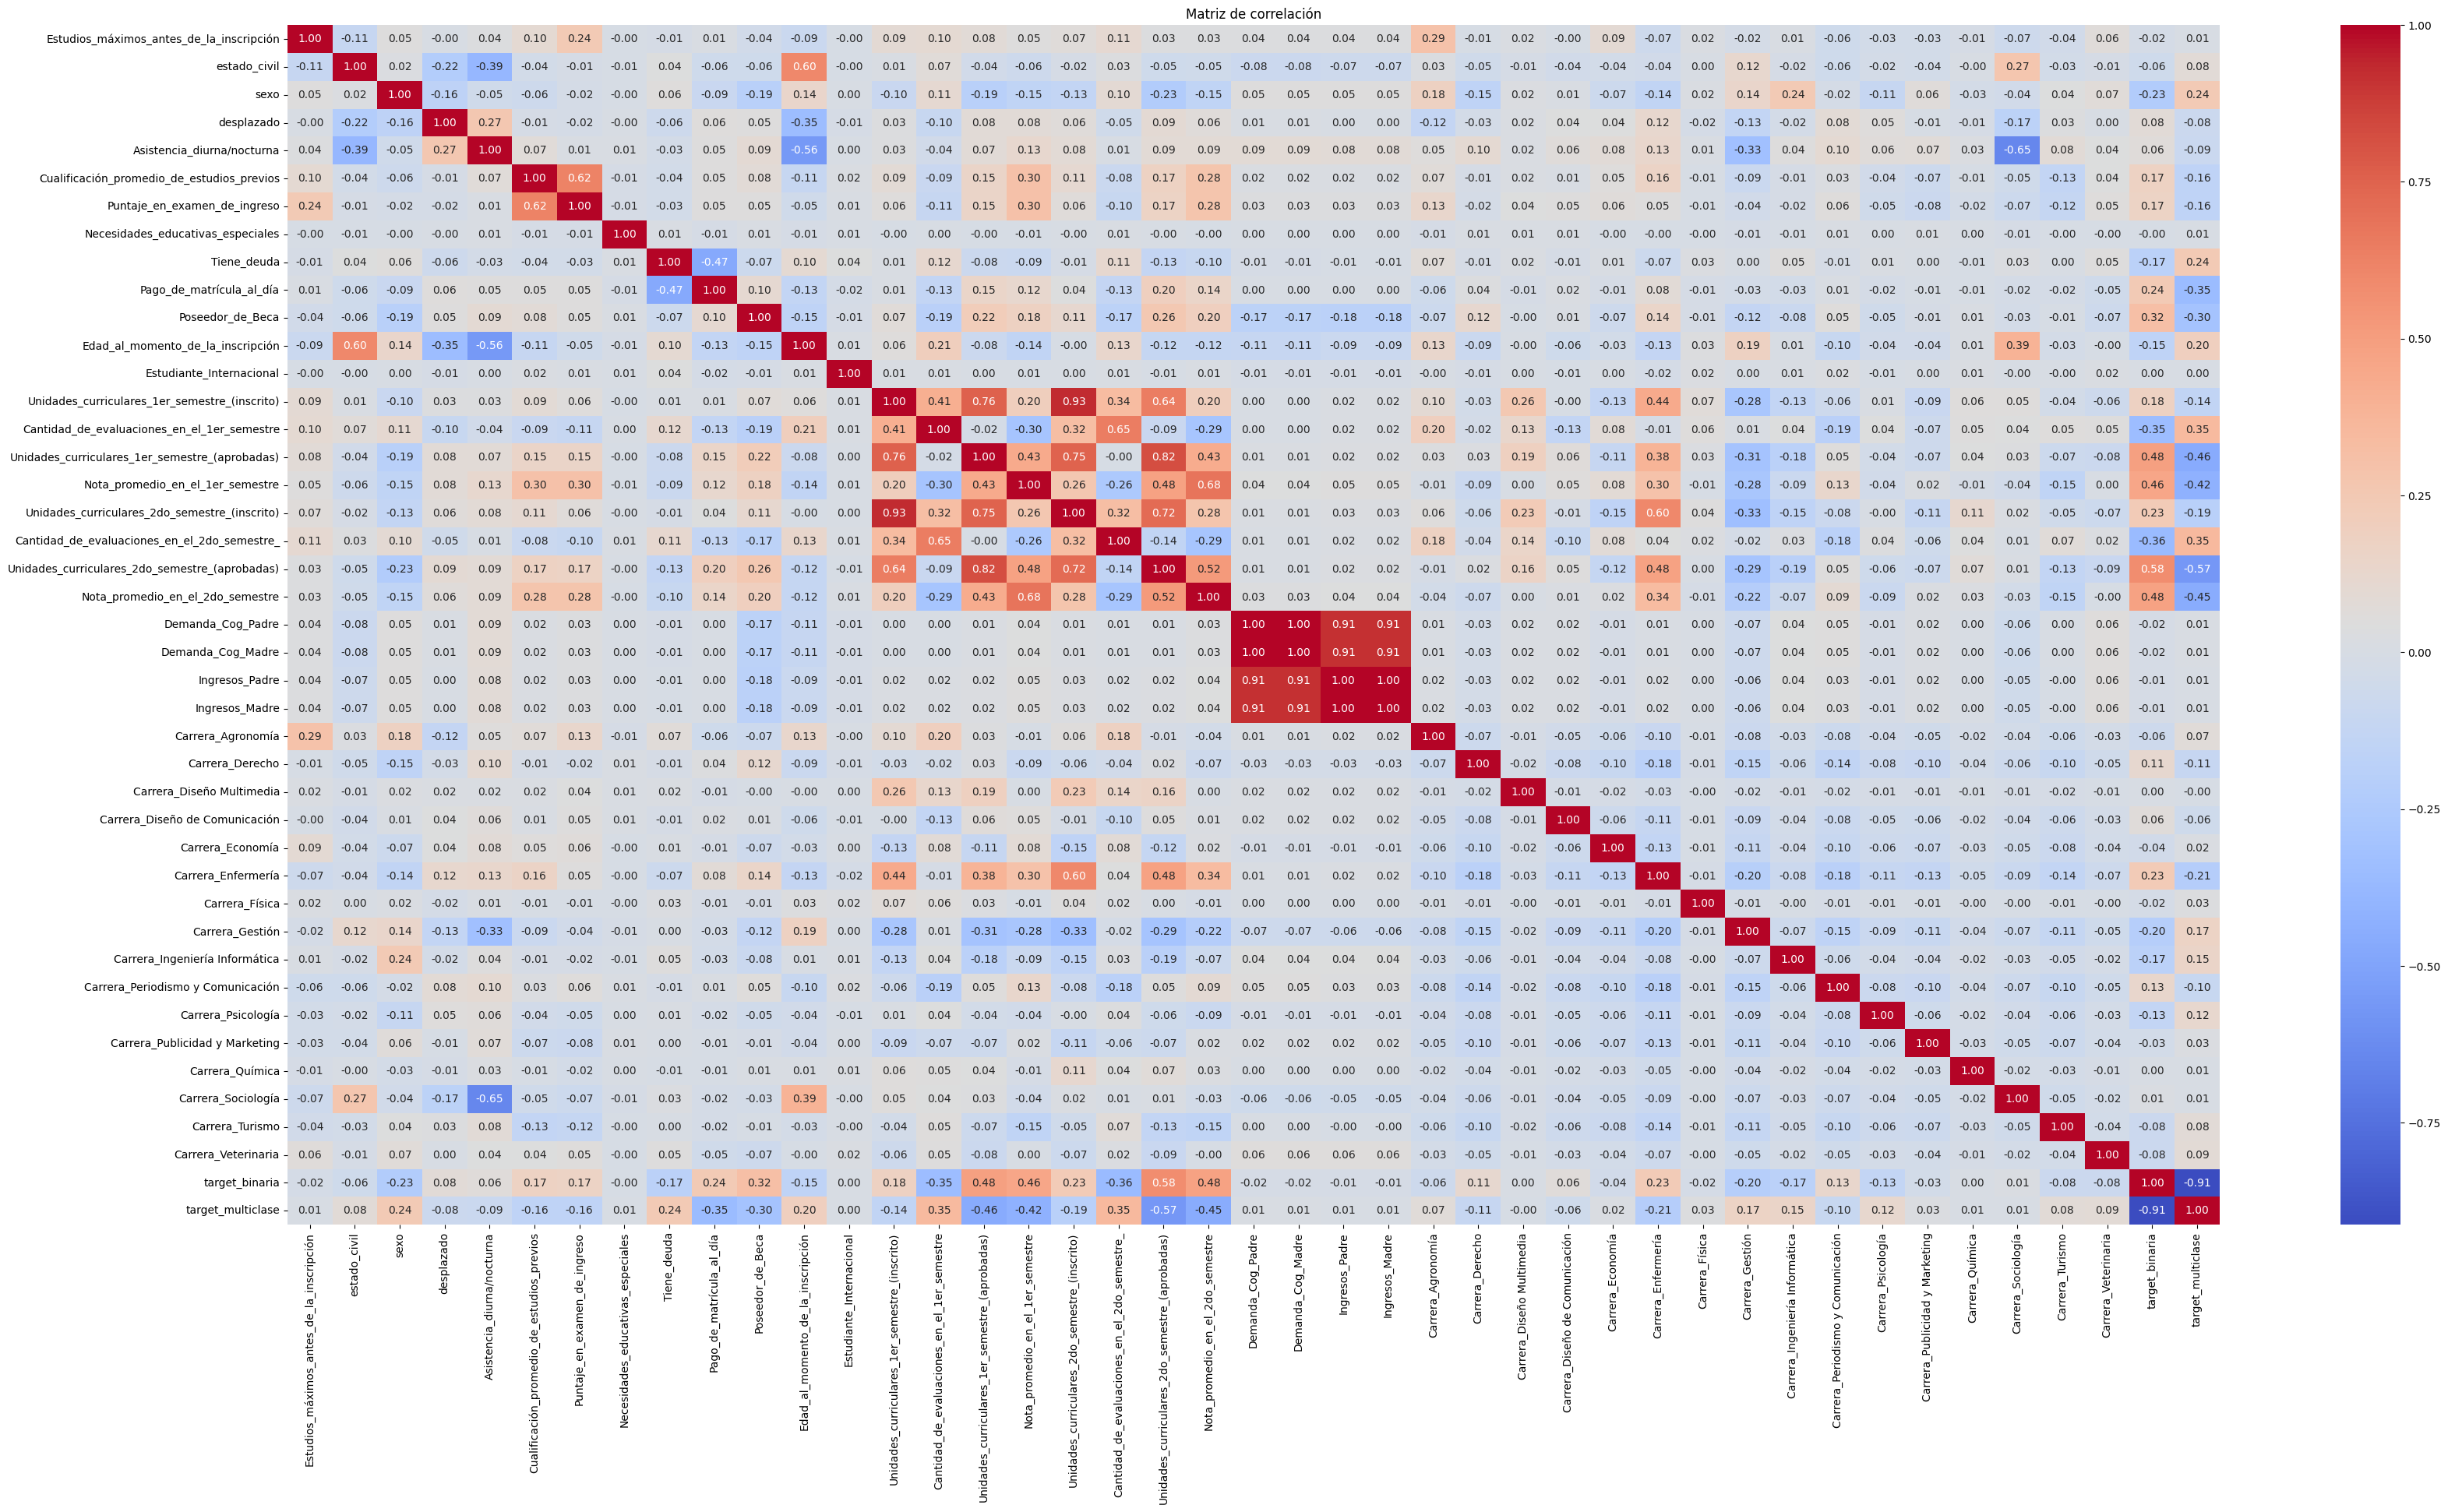

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [192]:
df_int.head()

Estudios_máximos_antes_de_la_inscripción  estado_civil  sexo  desplazado  \
0                                         3             1     0           0   
1                                         3             1     0           1   
2                                         3             1     0           1   
3                                         4             1     0           1   
4                                         3             1     1           1   

   Asistencia_diurna/nocturna  Cualificación_promedio_de_estudios_previos  \
0                           1                                          66   
1                           1                                          69   
2                           1                                          69   
3                           1                                          68   
4                           1                                          68   

   Puntaje_en_examen_de_ingreso  Necesidades_educativas_especiales  \
0                            65                                  0   
1                            66                                  0   
2                            63                                  0   
3                            68                                  0   
4                            70                                  0   

   Tiene_deuda  Pago_de_matrícula_al_día  ...  Carrera_Ingeniería Informática  \
0            0                         1  ...                               0   
1            0                         1  ...                               0   
2            0                         1  ...                               0   
3            0                         1  ...                               0   
4            0                         1  ...                               0   

   Carrera_Periodismo y Comunicación  Carrera_Psicología  \
0                                  0                   0   
1                                  0                   0   
2                                  0                   0   
3                                  0                   0   
4                                  1                   0   

   Carrera_Publicidad y Marketing  Carrera_Química  Carrera_Sociología  \
0                               0                0                   0   
1                               0                0                   0   
2                               0                0                   0   
3                               0                0                   0   
4                               0                0                   0   

   Carrera_Turismo  Carrera_Veterinaria  target_binaria  target_multiclase  
0                0                    0               1                  0  
1                0                    0               0                  1  
2                0                    0               1                  0  
3                0                    0               1                  0  
4                0                    0               1                  0  

[5 rows x 43 columns]

In [193]:
#Guardar csvs para modelado

df_int_multiclase = df_int.drop(columns=['target_binaria'])
df_int_binaria = df_int.drop(columns=['target_multiclase'])

In [194]:
df_int_multiclase.to_csv('../data/base_procesada_multiclase.csv', index=False)
df_int_binaria.to_csv('../data/base_procesada_binaria.csv', index=False)